In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
# from imblearn.combine import SMOTETomek, SMOTEENN

In [2]:
churn_df = pd.read_excel("CFM KTP_Stage 1 task_churn dataset.xlsx")

In [3]:
churn_df.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,FrequencyUse,FrequencySMS,DistinctCalls,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CallFailure         3150 non-null   int64  
 1   Complains           3150 non-null   int64  
 2   SubscriptionLength  3150 non-null   int64  
 3   ChargeAmount        3150 non-null   int64  
 4   SecondsUse          3150 non-null   int64  
 5   FrequencyUse        3150 non-null   int64  
 6   FrequencySMS        3150 non-null   int64  
 7   DistinctCalls       3150 non-null   int64  
 8   AgeGroup            3150 non-null   int64  
 9   TariffPlan          3150 non-null   int64  
 10  Status              3150 non-null   int64  
 11  Age                 3150 non-null   int64  
 12  CustomerValue       3150 non-null   float64
 13  Churn               3150 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 344.7 KB


In [5]:
churn_df.shape

(3150, 14)

In [6]:
# Checking for the number of duplicate rows, if any 
churn_df.duplicated().sum()

300

In [7]:
# duplicate = churn_df[churn_df.duplicated()]
# duplicate

In [8]:
churn_df.loc[churn_df["CustomerValue"] == 721.98]

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,FrequencyUse,FrequencySMS,DistinctCalls,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
3095,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0


In [9]:
churn_df.drop_duplicates(inplace = True)

In [10]:
churn_df.shape

(2850, 14)

In [11]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CallFailure,2850.0,7.802456,7.326172,0.0,1.0000,6.00,12.00,36.00
Complains,2850.0,0.080702,0.272424,0.0,0.0000,0.00,0.00,1.00
SubscriptionLength,2850.0,32.452982,8.723075,3.0,29.0000,35.00,38.00,47.00
ChargeAmount,2850.0,0.974737,1.550618,0.0,0.0000,0.00,2.00,10.00
SecondsUse,2850.0,4534.243158,4199.712303,0.0,1458.7500,3041.00,6500.00,17090.00
FrequencyUse,2850.0,70.484912,57.401512,0.0,28.0000,54.50,96.00,255.00
FrequencySMS,2850.0,73.789825,112.062397,0.0,7.0000,22.00,88.00,522.00
DistinctCalls,2850.0,23.870526,17.193929,0.0,11.0000,21.00,34.00,97.00
AgeGroup,2850.0,2.835088,0.893503,1.0,2.0000,3.00,3.00,5.00
TariffPlan,2850.0,1.080351,0.271883,1.0,1.0000,1.00,1.00,2.00


In [12]:
churn_df.isnull().sum()

CallFailure           0
Complains             0
SubscriptionLength    0
ChargeAmount          0
SecondsUse            0
FrequencyUse          0
FrequencySMS          0
DistinctCalls         0
AgeGroup              0
TariffPlan            0
Status                0
Age                   0
CustomerValue         0
Churn                 0
dtype: int64

* The data is clean, no missing values
* There are duplicate rows in the data
* All column are numerical, although there are categorical columns that have been converted to numrical

### Exploratory Data Analysis

In [13]:
num= []
cat = []

for i in churn_df.columns:
    if len(churn_df[i].unique()) > 10:
        num.append(i)
    else:
        cat.append(i)

In [14]:
cat

['Complains', 'AgeGroup', 'TariffPlan', 'Status', 'Age', 'Churn']

In [15]:
num

['CallFailure',
 'SubscriptionLength',
 'ChargeAmount',
 'SecondsUse',
 'FrequencyUse',
 'FrequencySMS',
 'DistinctCalls',
 'CustomerValue']

In [16]:
churn_df["Age"].unique()

array([30, 25, 15, 45, 55], dtype=int64)

#### How does TariffPlan affect the rate of Churn

In [17]:
# Table showing how tarrifplan relates to churn
Tariffplan = churn_df.groupby(['TariffPlan', 'Churn']).size().unstack().reset_index()
Tariffplan.columns = ["TariffPlan", "Did Not Churn", "Churn"]
Tariffplan

,TariffPlan,Did Not Churn,Churn
0,1,2181,440
1,2,223,6


In [18]:
Tariffplan_rate = churn_df.groupby('TariffPlan')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(1).reset_index()
Tariffplan_rate.columns = ["TariffPlan", "Did Not Churn Rate %", "Churn Rate %"]
Tariffplan_rate

,TariffPlan,Did Not Churn Rate %,Churn Rate %
0,1,83.2,16.8
1,2,97.4,2.6


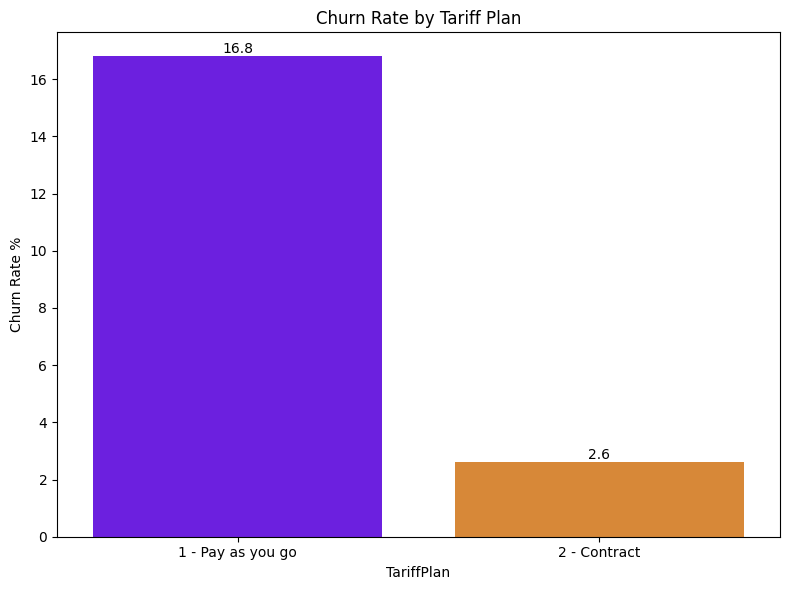

In [19]:
plt.figure(figsize=(8, 6))
palette = {"1": "#6600FF", "2": "#F1881D"}
ax = sns.barplot(data=Tariffplan_rate, y="Churn Rate %", x="TariffPlan", palette = palette)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge')  # '%.1f' formats to 1 decimal place

plt.title("Churn Rate by Tariff Plan")
ax.set_xticklabels(["1 - Pay as you go", "2 - Contract"])
# plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.tight_layout()
plt.show()

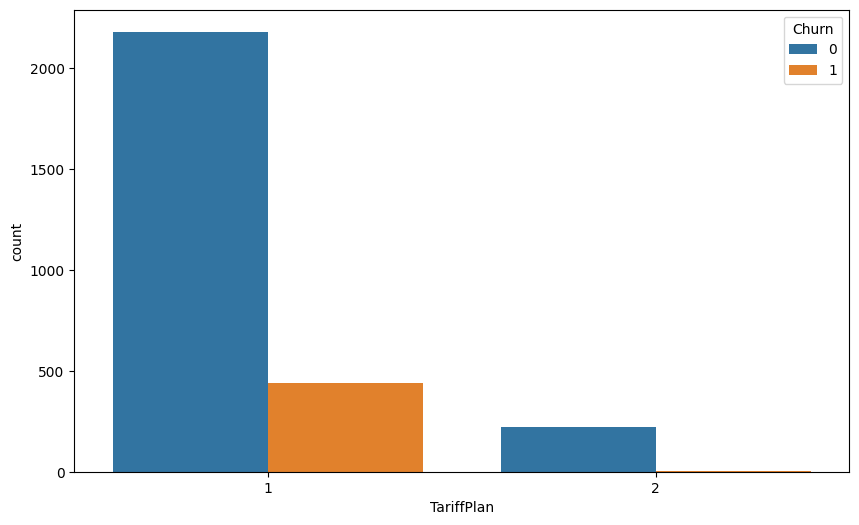

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "TariffPlan", hue = "Churn")
plt.show()

#### How does Complains affect the rate of Churn

In [21]:
# Table showing how Complains relates to churn
Complains = churn_df.groupby(['Complains', 'Churn']).size().unstack().reset_index()
Complains.columns = ["Complains", "Did Not Churn", "Churn"]
Complains

,Complains,Did Not Churn,Churn
0,0,2364,256
1,1,40,190


In [22]:
Complains_rate = churn_df.groupby('Complains')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Complains_rate.columns = ["Complains", "Did Not Churn Rate %", "Churn Rate %"]
Complains_rate

,Complains,Did Not Churn Rate %,Churn Rate %
0,0,90.0,10.0
1,1,17.0,83.0


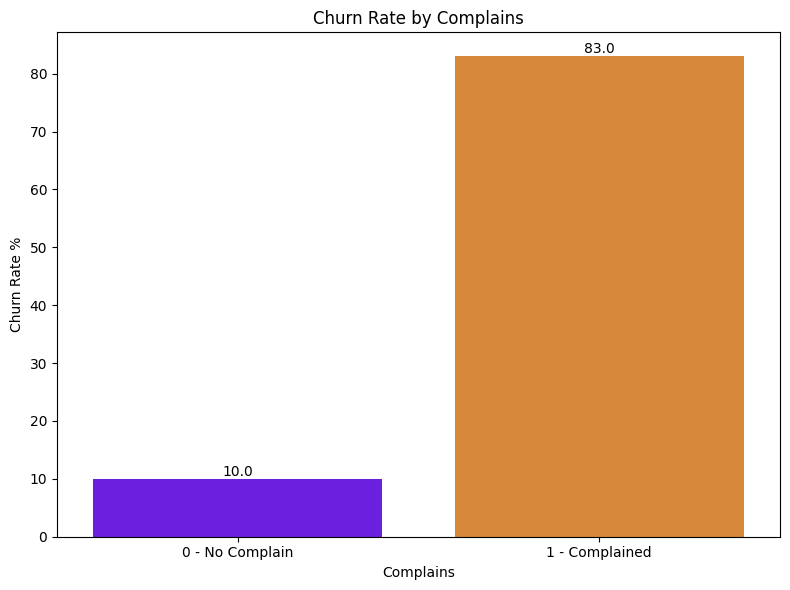

In [23]:
plt.figure(figsize=(8, 6))
palette = ["#6600FF",  "#F1881D"]
ax = sns.barplot(data=Complains_rate, y="Churn Rate %", x="Complains", palette = palette)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge')  # '%.1f' formats to 1 decimal place

plt.title("Churn Rate by Complains")
ax.set_xticklabels(["0 - No Complain", "1 - Complained"])
plt.tight_layout()
plt.show()

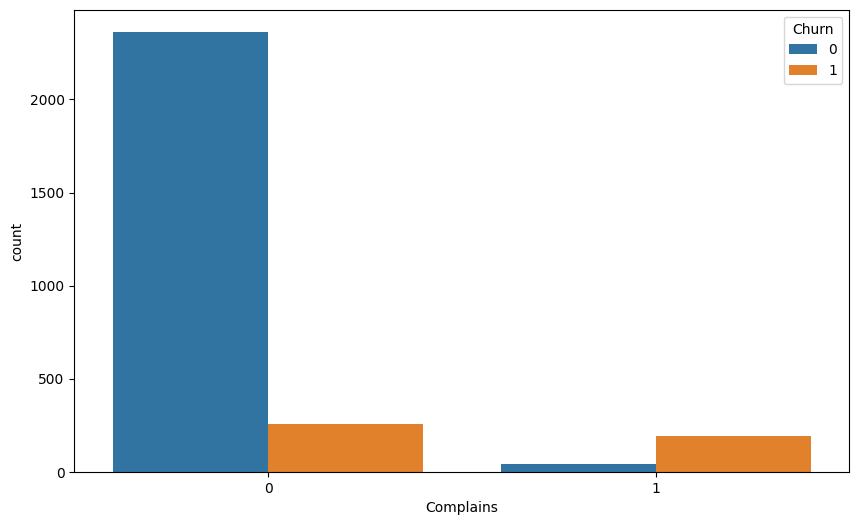

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Complains", hue = "Churn")
plt.show()

#### How does Status affect the rate of Churn

In [25]:
# Table showing how Complains relates to churn
Status = churn_df.groupby(['Status', 'Churn']).size().unstack().reset_index()
Status.columns = ["Status", "Did Not Churn", "Churn"]
Status

,Status,Did Not Churn,Churn
0,1,2045,121
1,2,359,325


In [26]:
Status_rate = churn_df.groupby('Status')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Status_rate.columns = ["Status", "Did Not Churn Rate %", "Churn Rate %"]
Status_rate

,Status,Did Not Churn Rate %,Churn Rate %
0,1,94.0,6.0
1,2,52.0,48.0


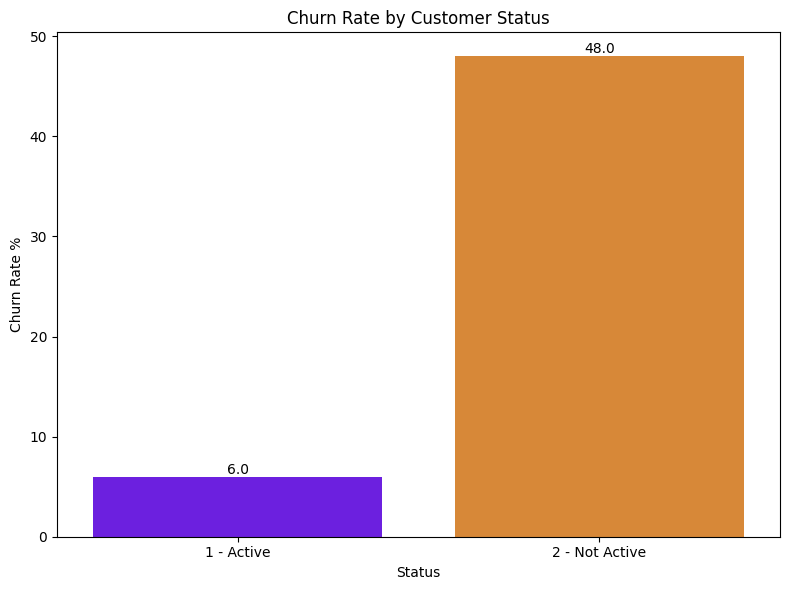

In [27]:
plt.figure(figsize=(8, 6))
palette = ["#6600FF",  "#F1881D"]
ax = sns.barplot(data = Status_rate, y="Churn Rate %", x="Status", palette = palette)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f', label_type = 'edge')  # '%.1f' formats to 1 decimal place

plt.title("Churn Rate by Customer Status")
ax.set_xticklabels(["1 - Active", "2 - Not Active"])
plt.tight_layout()
plt.show()

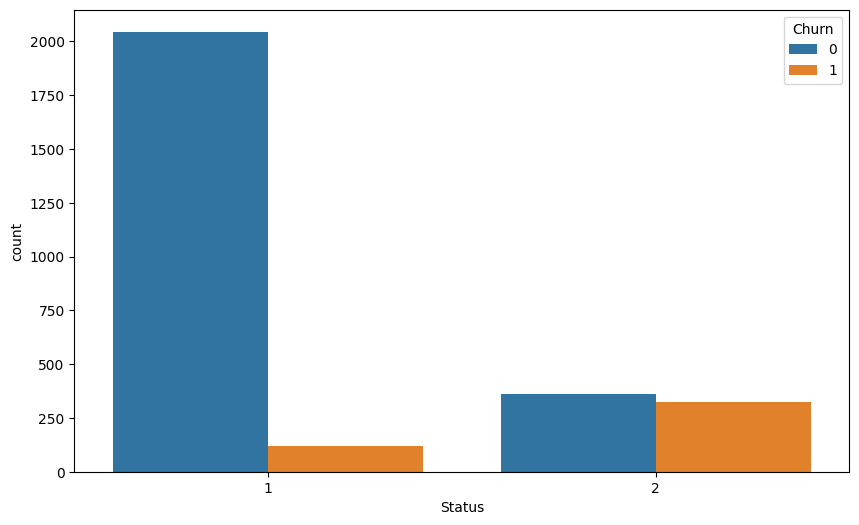

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Status", hue = "Churn")
plt.show()

#### How does Age affect the rate of Churn

In [29]:
# Table showing how Complains relates to churn
Age = churn_df.groupby(['Age', 'Churn']).size().unstack().reset_index()
Age.columns = ["Age", "Did Not Churn", "Churn"]
Age

,Age,Did Not Churn,Churn
0,15,112.0,NaN
1,25,764.0,157.0
2,30,1083.0,213.0
3,45,293.0,74.0
4,55,152.0,2.0


In [30]:
Age_rate = churn_df.groupby('Age')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Age_rate.columns = ["Age", "Did Not Churn Rate %", "Churn Rate %"]
Age_rate

,Age,Did Not Churn Rate %,Churn Rate %
0,15,100.0,NaN
1,25,83.0,17.0
2,30,84.0,16.0
3,45,80.0,20.0
4,55,99.0,1.0


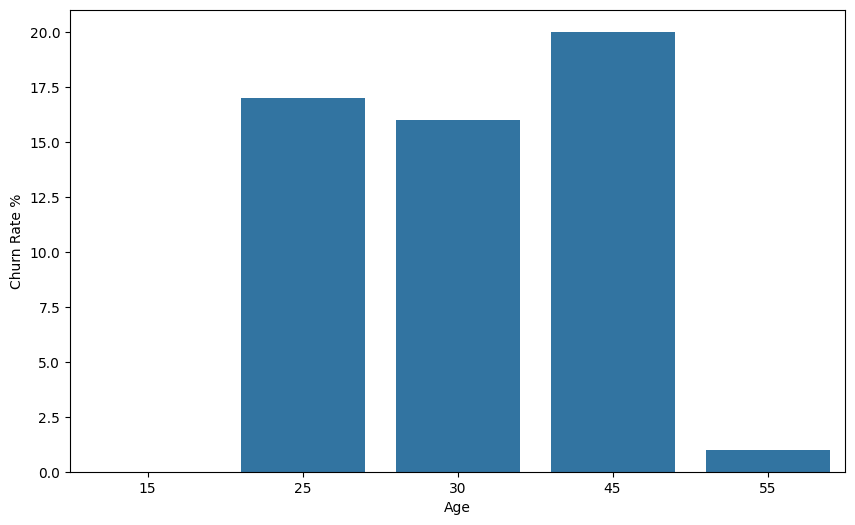

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data = Age_rate, y = "Churn Rate %", x = "Age")
plt.show()

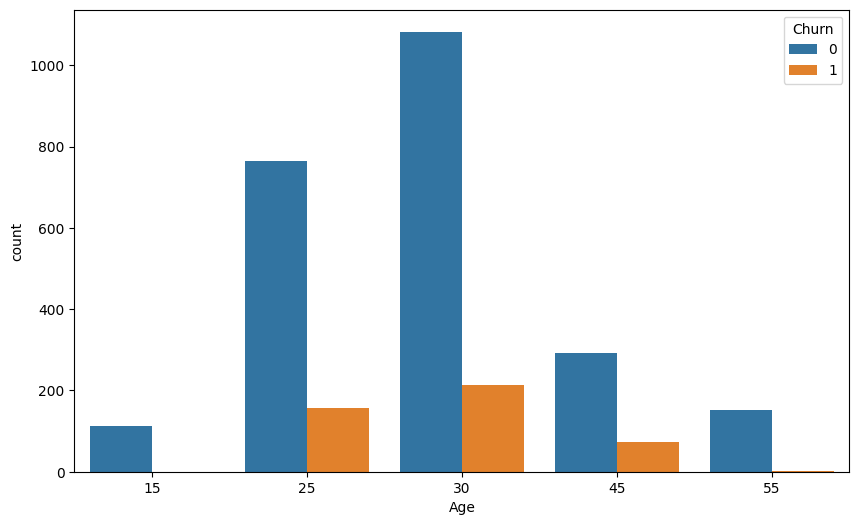

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Age", hue = "Churn")
plt.show()

#### How does Numerical features affect the rate of Churn

In [33]:
num

['CallFailure',
 'SubscriptionLength',
 'ChargeAmount',
 'SecondsUse',
 'FrequencyUse',
 'FrequencySMS',
 'DistinctCalls',
 'CustomerValue']

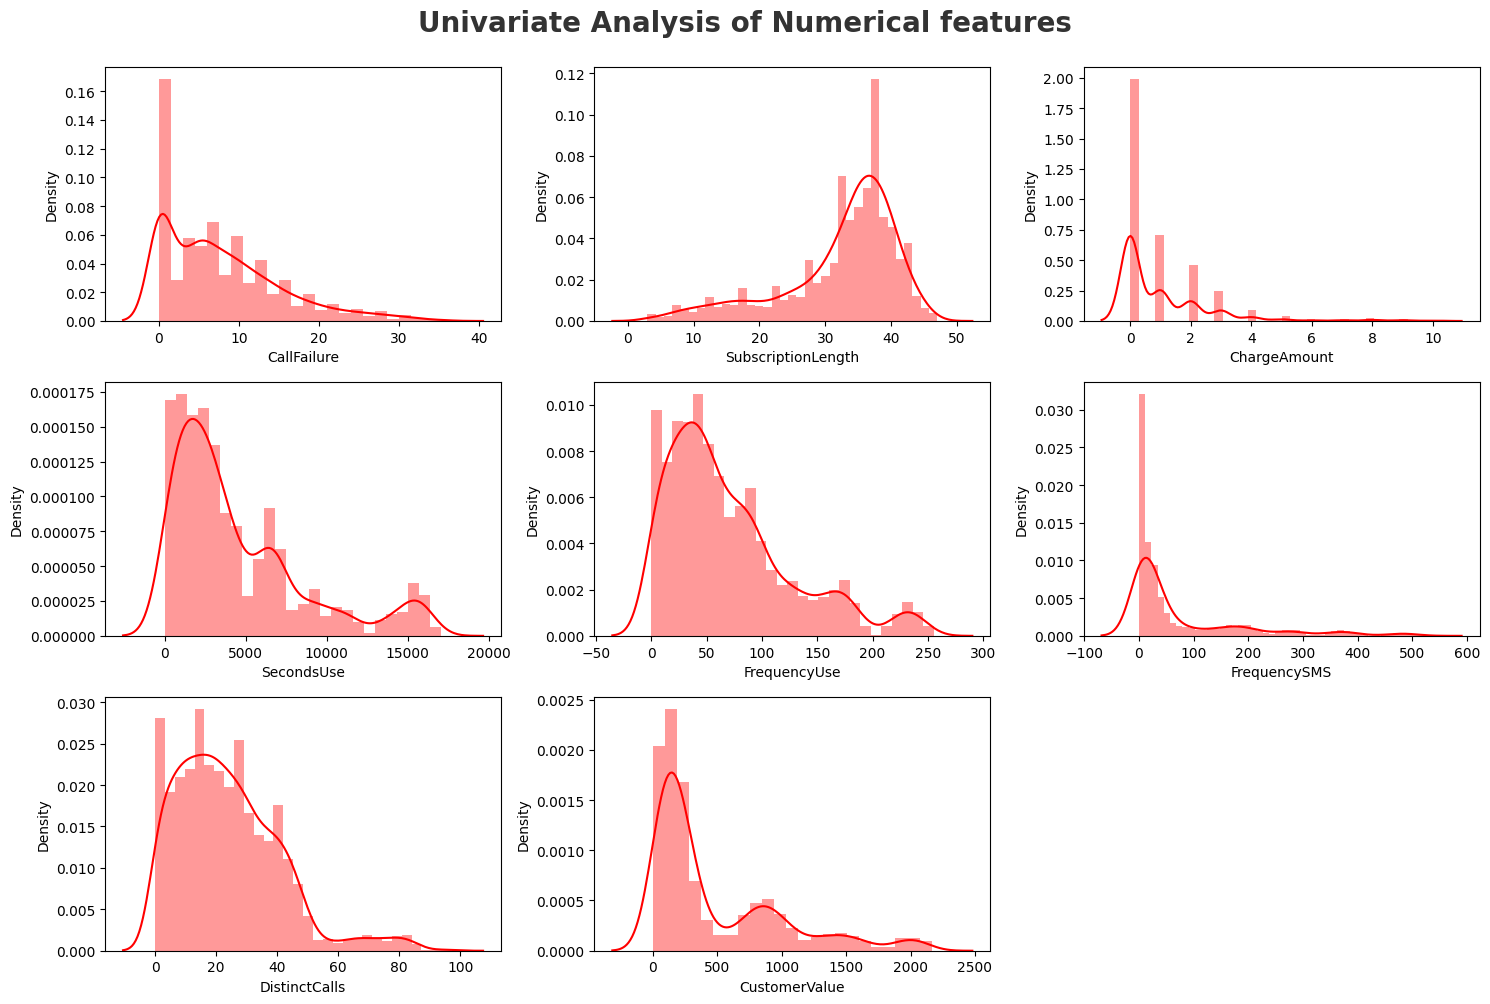

In [34]:
# Numberical features
plt.figure(figsize = (15, 10))
plt.suptitle("Univariate Analysis of Numerical features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)

for i in range(0, len(num)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(x = churn_df[num[i]], color = "red", kde = True)
    plt.xlabel(num[i])
    plt.tight_layout()

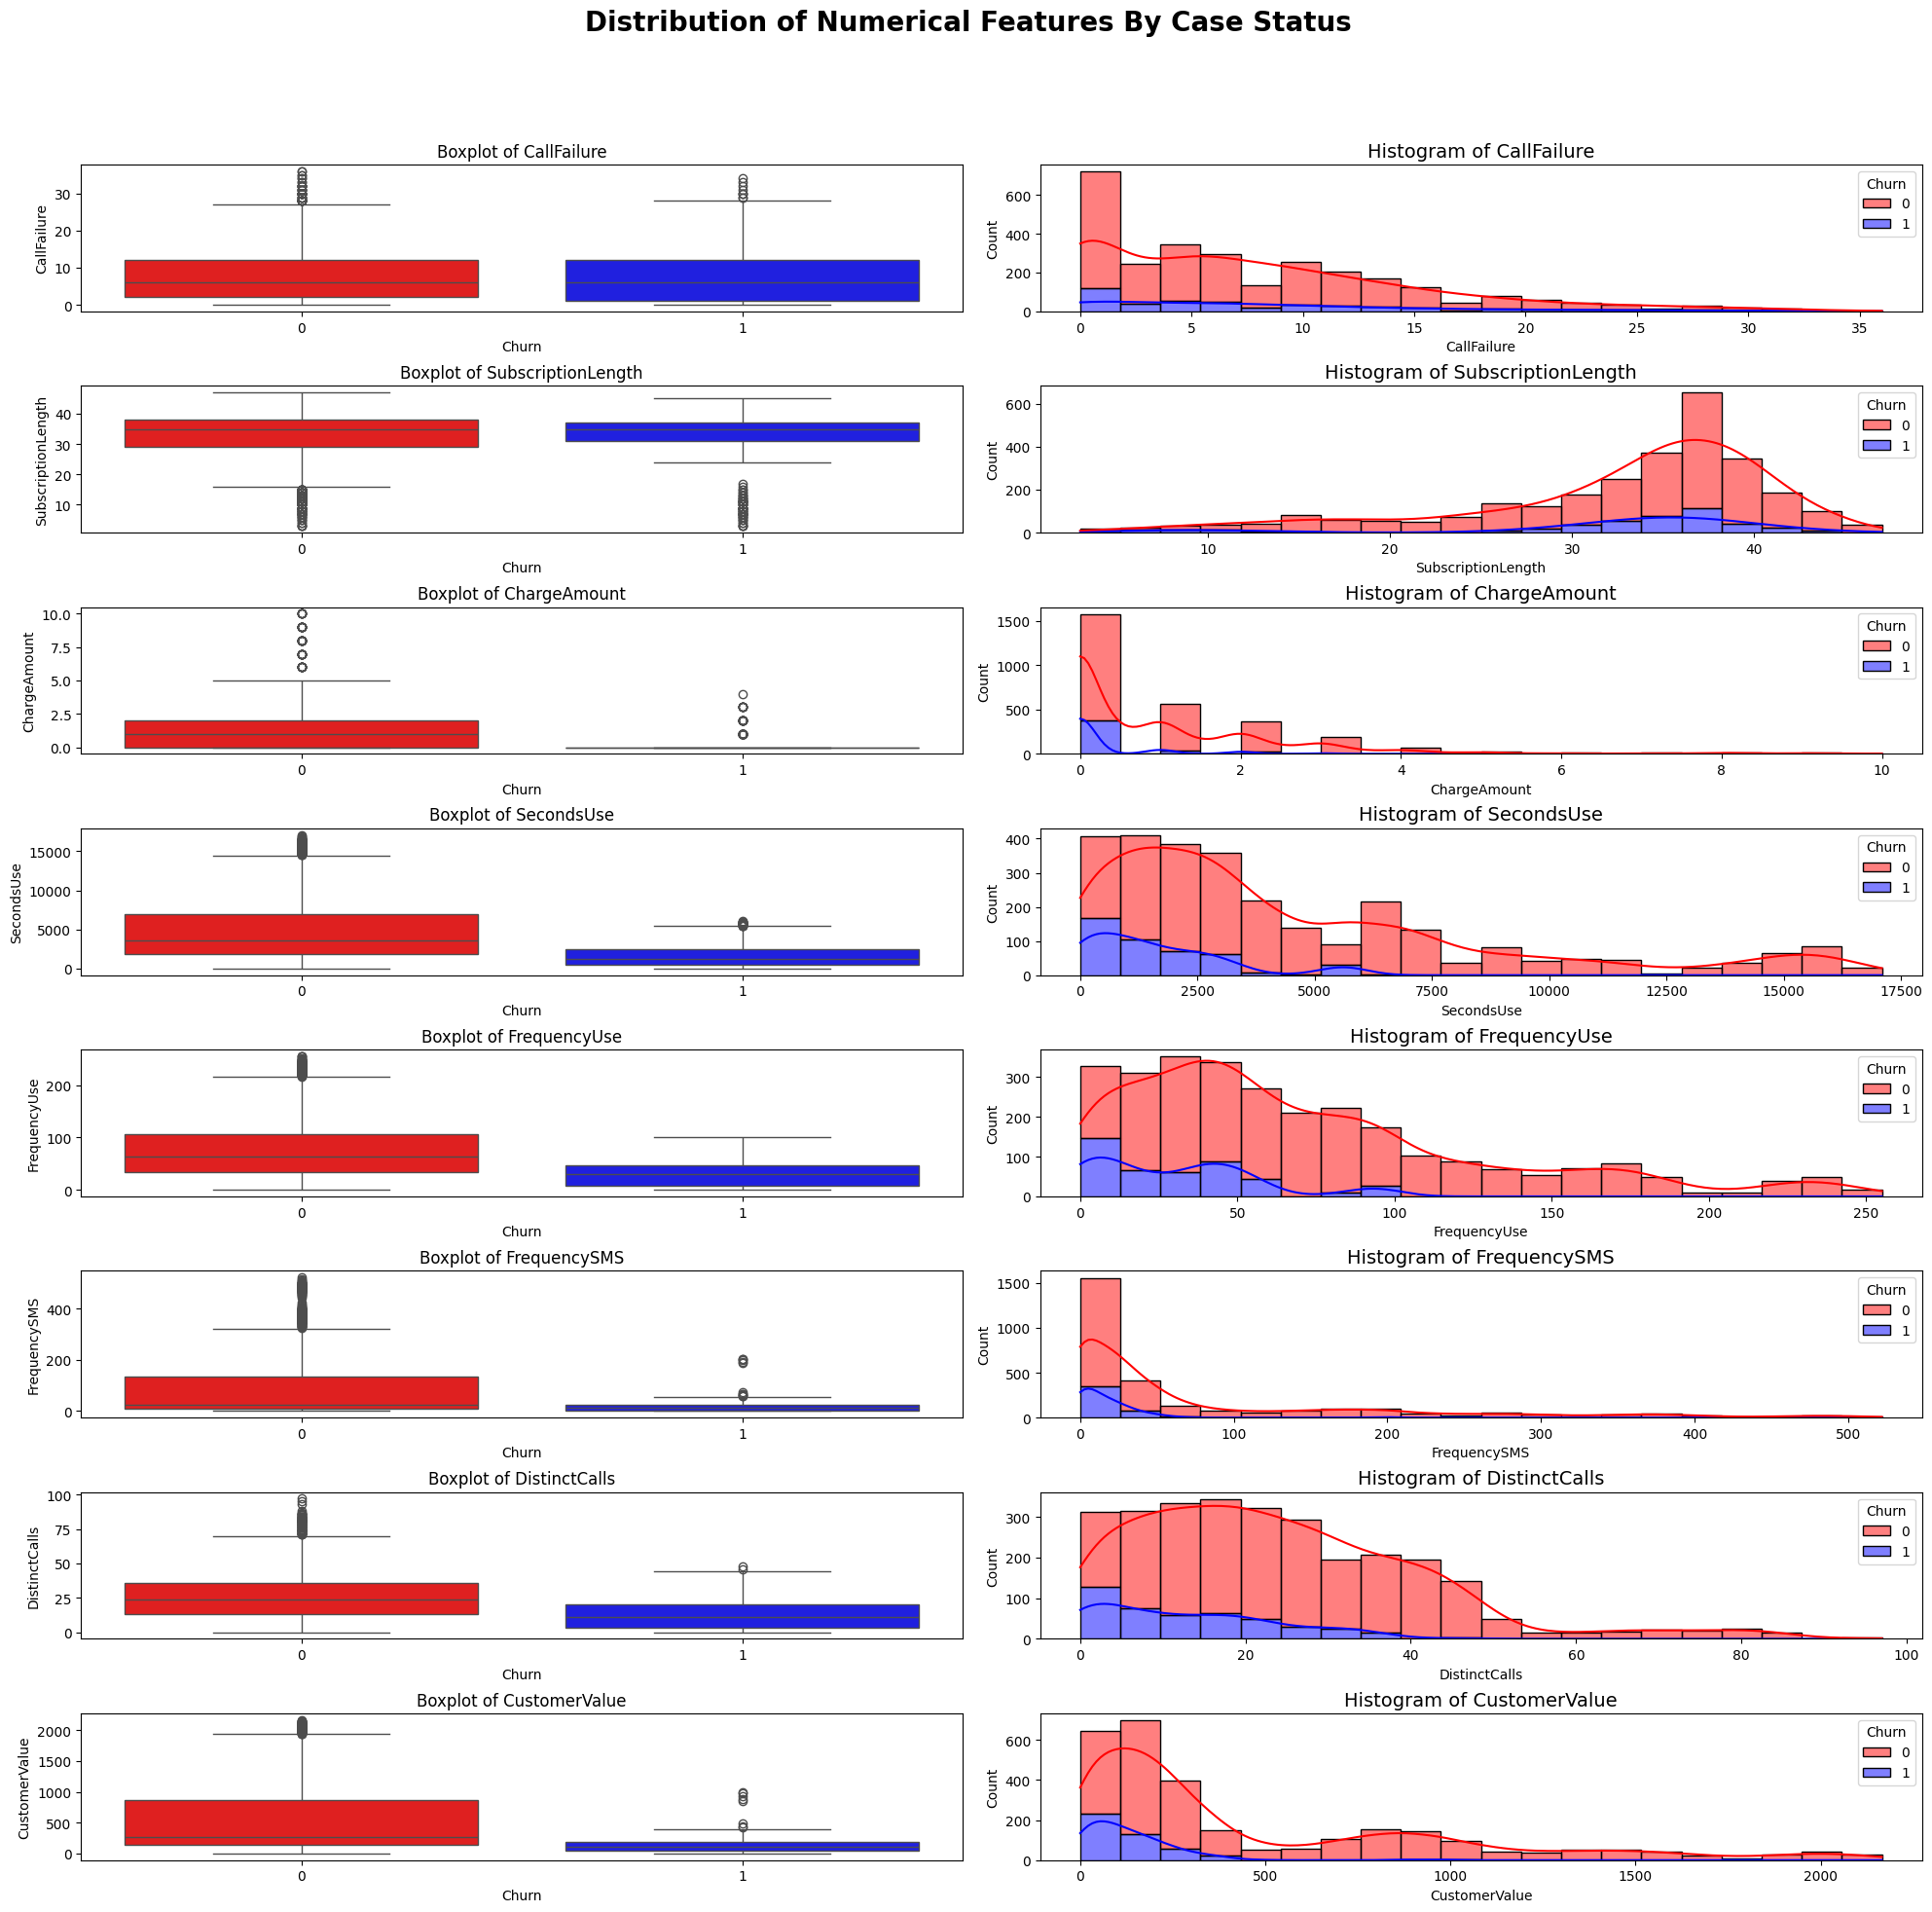

In [35]:
colour = ["red", "blue"]
fig, ax = plt.subplots(8, 2, figsize = (20, 20))
fig.suptitle("Distribution of Numerical Features By Case Status", fontsize = 20, fontweight = "bold", ha = "center")

for i, col in enumerate(num):
    sns.boxplot(data = churn_df, x = "Churn", y = col, palette = colour, ax = ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize = 12)
    sns.histplot(data = churn_df, x = col, hue = "Churn", bins = 20, kde = True, multiple = "stack", palette = colour, ax = ax[i,1])
    ax[i, 1].set_title(f"Histogram of {col}", fontsize = 14)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
# plt.savefig('image/multivariate_num.png')

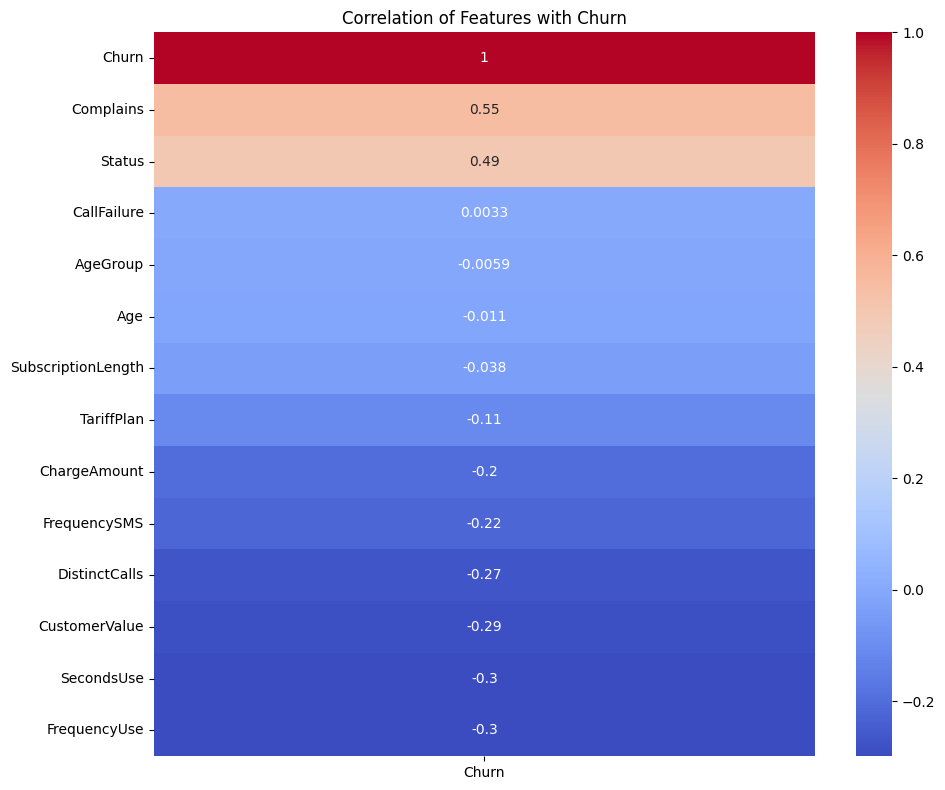

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = churn_df.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Churn')
plt.tight_layout()
plt.show()

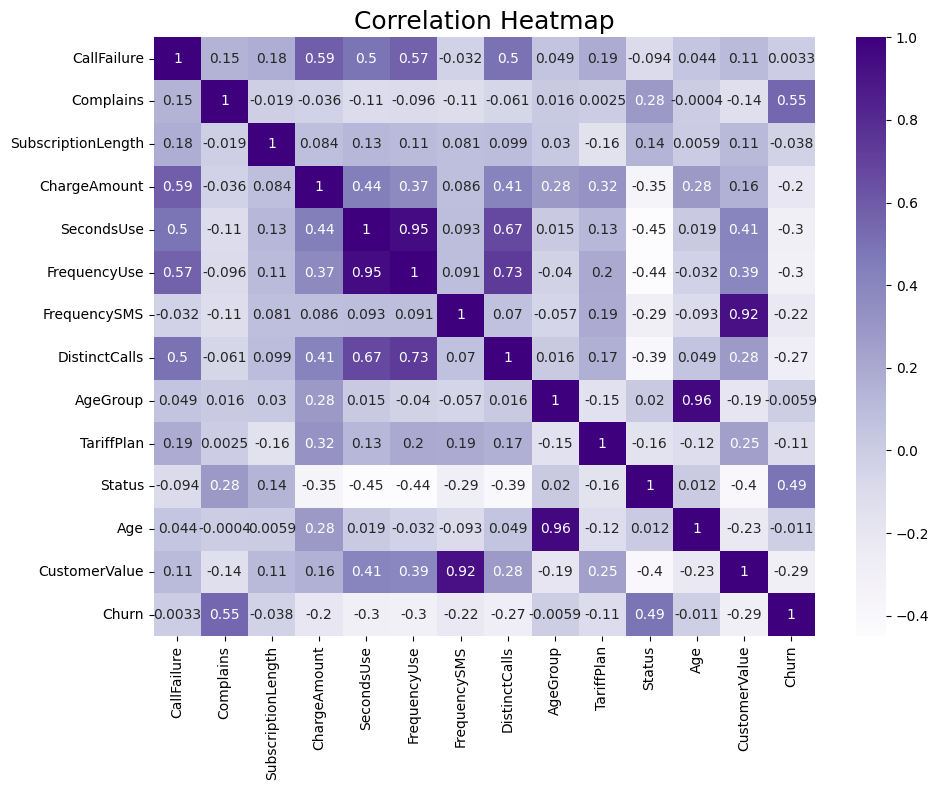

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = churn_df.corr()
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Correlation Heatmap', fontsize = 18)
plt.tight_layout()
plt.show()

### Model Building

In [38]:
churn_df.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,FrequencyUse,FrequencySMS,DistinctCalls,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


##### Feature Encoding and Scaling

In [39]:
x = churn_df.drop("Churn", axis = 1)
y = churn_df["Churn"]

In [40]:
print(x.shape)
print(y.shape)

(2850, 13)
(2850,)


In [41]:
# oh_columns = [i for i in cat if i != "Churn"]
# transform_columns = num.copy()
transform_columns = x.columns

In [42]:
scaler = StandardScaler()
# oh_encoder = OneHotEncoder()

tranform_pipeline  = Pipeline(steps = [("transformer", PowerTransformer(method = "yeo-johnson")), ("scaler", scaler)])

# preprocessor = ColumnTransformer([("oh_encoder", oh_encoder, oh_columns), ("transformer", tranform_pipeline, transform_columns)])
preprocessor = ColumnTransformer([("transformer", tranform_pipeline, transform_columns)])


In [43]:
x_pro = preprocessor.fit_transform(x)

In [44]:
x_pro.shape, x.shape

((2850, 13), (2850, 13))

##### Class Imbalance

In [45]:
# # Visualizing the Target variable
# percentage = churn_df["Churn"].value_counts(normalize = True) * 100
# labels = ["Did not Churn", "Churned"]

# # plot piechart
# fig, ax = plt.subplots(figsize = (15, 8))
# explode = (0, 0.1)
# colour = ["blue", "red"]
# ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
# plt.title("Target Distribution of the Original Data")
# plt.show()

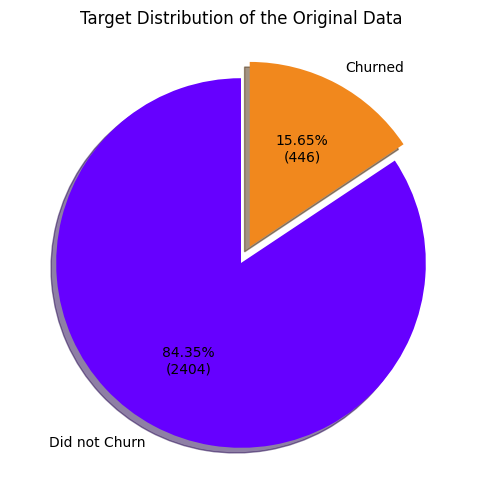

In [46]:
# Visualizing the Target variable
counts = churn_df["Churn"].value_counts()
percentage = counts / counts.sum() * 100
labels = ["Did not Churn", "Churned"]

# Plot piechart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0, 0.1)
colour = ["#6600FF",  "#F1881D"]

ax.pie(percentage, labels=labels, startangle=90, autopct=lambda pct: f"{pct:.2f}%\n({int(round(pct/100.*sum(counts)))})",
        explode=explode, shadow=True,colors=colour)

plt.title("Target Distribution of the Original Data")
plt.show()


In [47]:
# there is a class imbalance in the target variable, to deal with this I used the SMOTE algorithm to balance the distribution
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created
x_res, y_res = sm.fit_resample(x_pro, y) # The object is applied

In [48]:
# creating a dataframe for the balanced data
x_res_df = pd.DataFrame(x_res)
y_res_df = pd.DataFrame(y_res)
balanced_churn_df = pd.concat([x_res_df, y_res_df], axis = 1)

In [49]:
churn_df.shape, balanced_churn_df.shape

((2850, 14), (4808, 14))

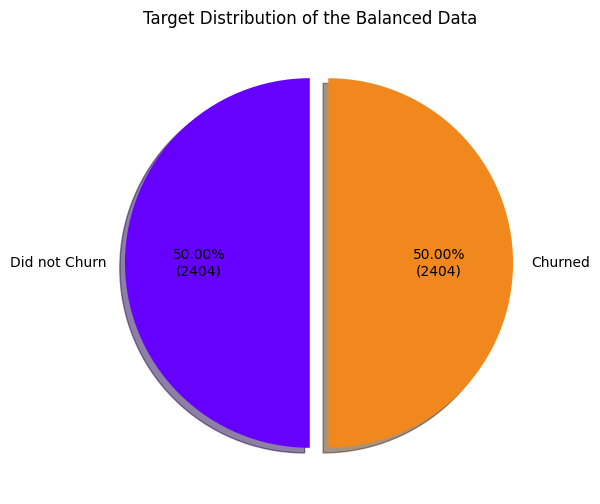

In [50]:
# Visualizing the Target variable
counts = balanced_churn_df["Churn"].value_counts()
percentage = counts / counts.sum() * 100
labels = ["Did not Churn", "Churned"]

# Plot piechart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0, 0.1)
colour = ["#6600FF",  "#F1881D"]

ax.pie(percentage, labels=labels, startangle=90, autopct=lambda pct: f"{pct:.2f}%\n({int(round(pct/100.*sum(counts)))})",
        explode=explode, shadow=True,colors=colour)

plt.title("Target Distribution of the Balanced Data")
plt.show()

##### Model Training

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state = 42, test_size = 0.3)

In [52]:
x_train.shape, x_test.shape

((3365, 13), (1443, 13))

In [53]:
def eval_metrics(true, predicted):
    accuracy = accuracy_score(true, predicted)
    # f1 = f1_score(true, predicted)
    # precision = precision_score(true, predicted)
    # recall = recall_score(true, predicted)
    # roc_auc = roc_auc_score(true, predicted)
    return accuracy

In [54]:
models = {"RF": RandomForestClassifier(verbose=0),
          "DT": DecisionTreeClassifier(),
          "LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "XGB": XGBClassifier(verbose=0),
          "CB": CatBoostClassifier(verbose=0),
          "SVM": SVC()
          }

In [55]:
def model_evaluation(x, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Return
    '''

    # splitting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

    model_list = []
    accuracy_list = []
    auc_list = []


    for i in range(len(list(models))):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # train the model
        model.fit(x_train, y_train)

        # make prediction
        y_test_pred = model.predict(x_test)

        # testing evaluation metrics
        accuracy_test= eval_metrics(y_test, y_test_pred)

        model_list.append(model_name)
       
        accuracy_list.append(round(accuracy_test, 3) * 100)



    data = {'Model Name': model_list, 'Accuracy': accuracy_list}   
    report = pd.DataFrame(data).sort_values(by=['Accuracy'], ascending = False).reset_index(drop = True)
        
    return report




In [56]:
base_models = model_evaluation(x_res, y_res, models)
base_models

,Model Name,Accuracy
0,XGB,97.9
1,CB,97.9
2,RF,97.4
3,KNN,96.1
4,DT,95.8
5,SVM,93.2
6,LR,84.8


##### Hyperparameter Tuning

In [57]:
#Initialize few parameter for Hyperparamter tuning
xgb_params = {
    "max_depth": range(3, 10, 2),
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10, 50, 100, 200]
    }

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
    }

cb_params = {
    "iterations": [100, 200, 300],            
    "depth": [3, 4, 5, 6, 7],            
    "bootstrap_type": ['Bayesian', 'Bernoulli']
    }



In [58]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGB', XGBClassifier(verbose = 0), xgb_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("CB", CatBoostClassifier(verbose=0), cb_params)
    ]

In [59]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   n_jobs=-1)
    random.fit(x_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for XGB -------------------
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20}
---------------- Best Params for CB -------------------
{'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}


In [60]:
model_param

{'XGB': {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20},
 'CB': {'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}}

##### Retraining the Model with Best Params

In [61]:
tuned_models = {
    "XGB": XGBClassifier(**model_param['XGB'], verbose = 0),
    "RF": RandomForestClassifier(**model_param['RF']),
    "CB": CatBoostClassifier(**model_param['CB'], verbose = 0),
    }

best_models = model_evaluation(x_res, y_res, tuned_models)

In [62]:
best_models

,Model Name,Accuracy
0,XGB,97.9
1,CB,97.7
2,RF,97.5


In [63]:
best_model = XGBClassifier(**model_param['XGB'], verbose = 0)
best_model = best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
target_names = ["Did not Churn", "Churned"]
cr = classification_report(y_test, y_pred, target_names = target_names)

print("FINAL MODEL 'XGB'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGB'
Accuracy Score value: 0.9785
               precision    recall  f1-score   support

Did not Churn       0.99      0.97      0.98       737
      Churned       0.97      0.99      0.98       706

     accuracy                           0.98      1443
    macro avg       0.98      0.98      0.98      1443
 weighted avg       0.98      0.98      0.98      1443



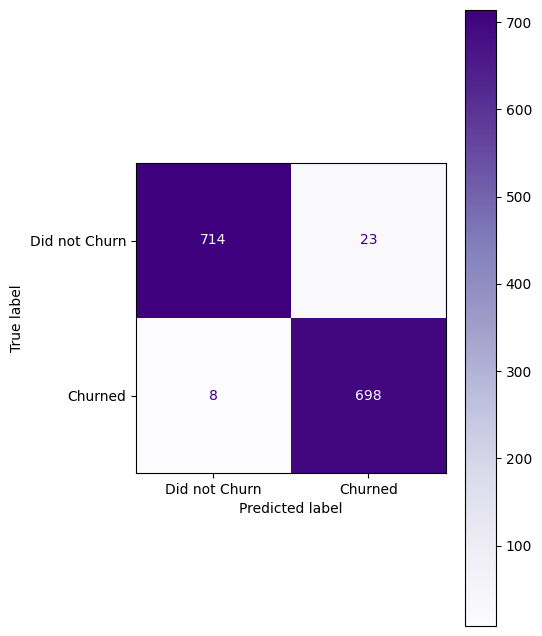

In [64]:
# plt.figure(figsize=(615, 15))
disp = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test, display_labels = target_names, cmap= "Purples")
disp.figure_.set_size_inches(5, 8)

plt.show()

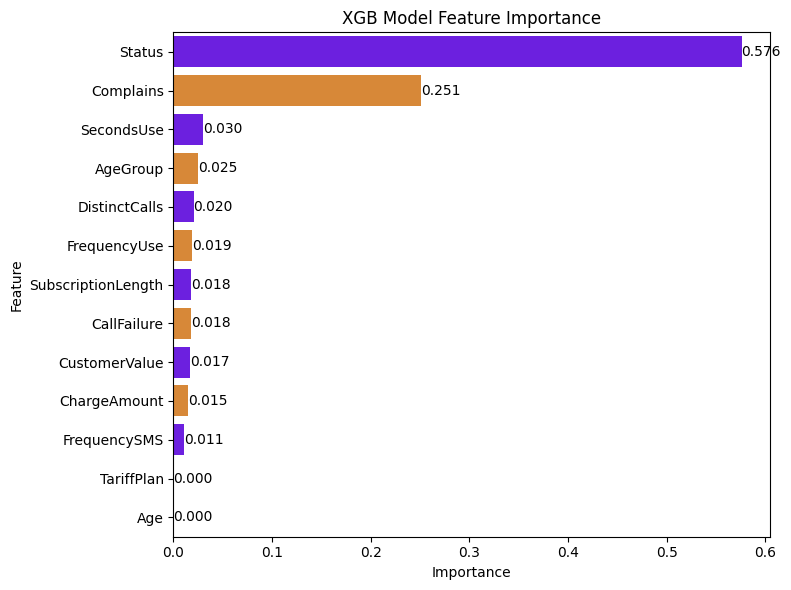

In [66]:
importances = best_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
ax = sns.barplot(data = feature_importance_df, y="Feature", x="Importance", palette = palette)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.3f', label_type = 'edge')  # '%.1f' formats to 1 decimal place

plt.title('XGB Model Feature Importance')
plt.tight_layout()
plt.show()

In [67]:
feature_importance_df

,Feature,Importance
10,Status,0.575867
1,Complains,0.250650
4,SecondsUse,0.030307
8,AgeGroup,0.025356
7,DistinctCalls,0.020470
5,FrequencyUse,0.019086
2,SubscriptionLength,0.017974
0,CallFailure,0.017835
12,CustomerValue,0.017087
3,ChargeAmount,0.014601


### Model Building with Feature Selection

In [68]:
churn_fs = churn_df.drop(["FrequencyUse", "Age", "TariffPlan", "FrequencySMS"], axis = 1)

In [69]:
churn_fs.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,DistinctCalls,AgeGroup,Status,CustomerValue,Churn
0,8,0,38,0,4370,17,3,1,197.640,0
1,0,0,39,0,318,4,2,2,46.035,0
2,10,0,37,0,2453,24,3,1,1536.520,0
3,10,0,38,0,4198,35,1,1,240.020,0
4,3,0,38,0,2393,33,1,1,145.805,0


##### Feature Encoding and Scaling

In [70]:
x_fs = churn_fs.drop("Churn", axis = 1)
y_fs = churn_fs["Churn"]

In [71]:
print(x_fs.shape)
print(y_fs.shape)

(2850, 9)
(2850,)


In [72]:
# oh_columns = [i for i in cat if i != "Churn"]
# transform_columns = num.copy()
transform_columnsfs = x_fs.columns

In [73]:
scalerfs = StandardScaler()
# oh_encoder = OneHotEncoder()

tranform_pipelinefs  = Pipeline(steps = [("transformer", PowerTransformer(method = "yeo-johnson")), ("scaler", scalerfs)])

# preprocessor = ColumnTransformer([("oh_encoder", oh_encoder, oh_columns), ("transformer", tranform_pipeline, transform_columns)])
preprocessorfs = ColumnTransformer([("transformer", tranform_pipelinefs, transform_columnsfs)])


In [74]:
x_profs = preprocessorfs.fit_transform(x_fs)

In [75]:
x_profs.shape, x_fs.shape

((2850, 9), (2850, 9))

##### Class Imbalance

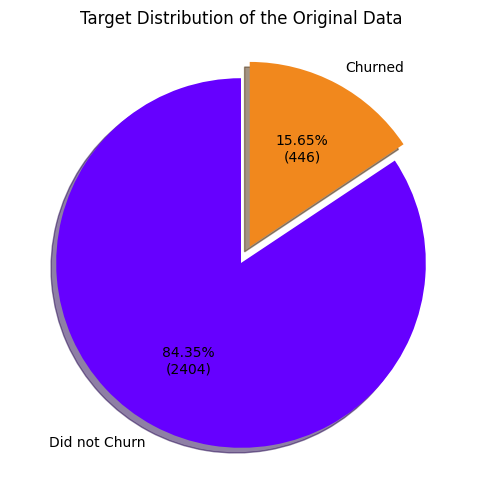

In [76]:
# Visualizing the Target variable
countsfs = churn_fs["Churn"].value_counts()
percentagefs = countsfs / countsfs.sum() * 100
labels = ["Did not Churn", "Churned"]

# Plot piechart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0, 0.1)
colour = ["#6600FF",  "#F1881D"]

ax.pie(percentagefs, labels=labels, startangle=90, autopct=lambda pct: f"{pct:.2f}%\n({int(round(pct/100.*sum(countsfs)))})",
        explode=explode, shadow=True,colors=colour)

plt.title("Target Distribution of the Original Data")
plt.show()

In [77]:
# there is a class imbalance in the target variable, to deal with this I used the SMOTE algorithm to balance the distribution
smfs = SMOTE(random_state=42, k_neighbors = 2) # The object is created
x_resfs, y_resfs = smfs.fit_resample(x_profs, y_fs) # The object is applied

In [78]:
# creating a dataframe for the balanced data
x_res_dfs = pd.DataFrame(x_resfs)
y_res_dfs = pd.DataFrame(y_resfs)
balanced_churn_dfs = pd.concat([x_res_dfs, y_res_dfs], axis = 1)

In [79]:
churn_fs.shape, balanced_churn_dfs.shape

((2850, 10), (4808, 10))

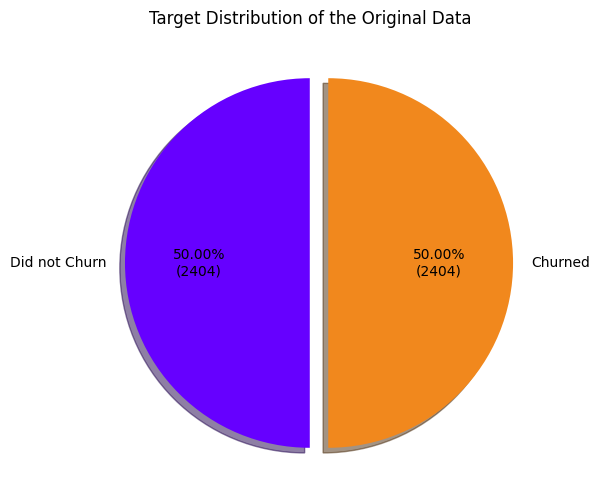

In [80]:
# Visualizing the Target variable
countsfs = balanced_churn_dfs["Churn"].value_counts()
percentagefs = countsfs / countsfs.sum() * 100
labels = ["Did not Churn", "Churned"]

# Plot piechart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0, 0.1)
colour = ["#6600FF",  "#F1881D"]

ax.pie(percentagefs, labels=labels, startangle=90, autopct=lambda pct: f"{pct:.2f}%\n({int(round(pct/100.*sum(countsfs)))})",
        explode=explode, shadow=True,colors=colour)

plt.title("Target Distribution of the Original Data")
plt.show()

##### Model Training

In [81]:
x_trainfs, x_testfs, y_trainfs, y_testfs = train_test_split(x_resfs, y_resfs, random_state = 42, test_size = 0.3)

In [82]:
x_trainfs.shape, x_testfs.shape

((3365, 9), (1443, 9))

In [83]:
base_modelsfs = model_evaluation(x_resfs, y_resfs, models)
base_modelsfs

,Model Name,Accuracy
0,XGB,97.4
1,CB,97.1
2,RF,97.0
3,DT,95.9
4,KNN,95.8
5,SVM,93.5
6,LR,84.1


##### Hyperparameter Tuning

In [84]:
model_paramfs = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   n_jobs=-1)
    random.fit(x_resfs, y_resfs)
    model_paramfs[name] = random.best_params_

for model_name in model_paramfs:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_paramfs[model_name])

---------------- Best Params for XGB -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 7}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for CB -------------------
{'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bayesian'}


In [85]:
model_paramfs

{'XGB': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 7},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'CB': {'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bayesian'}}

##### Retraining the Model with Best Params

In [86]:
tuned_modelsfs = {
    "XGB": XGBClassifier(**model_paramfs['XGB'], verbose = 0),
    "RF": RandomForestClassifier(**model_paramfs['RF']),
    "CB": CatBoostClassifier(**model_paramfs['CB'], verbose = 0),
    }

best_modelsfs = model_evaluation(x_resfs, y_resfs, tuned_modelsfs)

In [87]:
best_modelsfs

,Model Name,Accuracy
0,XGB,97.1
1,CB,97.1
2,RF,97.0


In [88]:
best_modelfs = XGBClassifier(**model_paramfs['XGB'], verbose = 0)
best_modelfs = best_model.fit(x_trainfs, y_trainfs)
y_predfs = best_model.predict(x_testfs)
scorefs = accuracy_score(y_testfs, y_predfs)
crfs = classification_report(y_testfs, y_predfs, target_names = target_names)

print("FINAL MODEL 'XGB'")
print ("Accuracy Score value: {:.4f}".format(scorefs))
print (crfs)

FINAL MODEL 'XGB'
Accuracy Score value: 0.9723
               precision    recall  f1-score   support

Did not Churn       0.98      0.96      0.97       737
      Churned       0.96      0.98      0.97       706

     accuracy                           0.97      1443
    macro avg       0.97      0.97      0.97      1443
 weighted avg       0.97      0.97      0.97      1443



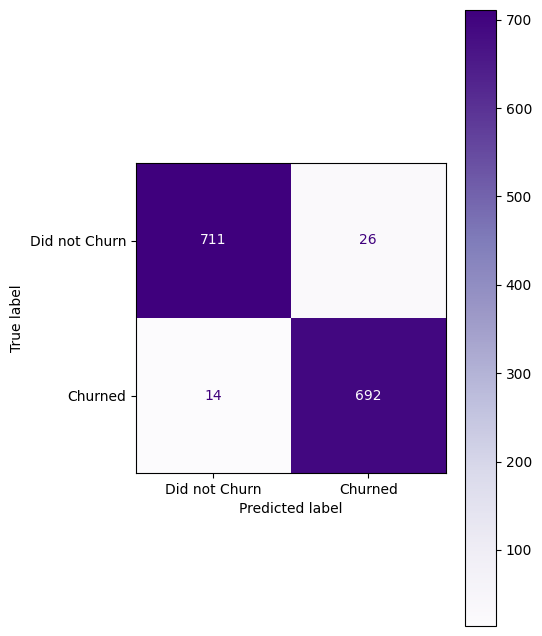

In [89]:
con = ConfusionMatrixDisplay.from_estimator(best_modelfs, x_testfs, y_testfs, display_labels = target_names, cmap = "Purples")
con.figure_.set_size_inches(5, 8)

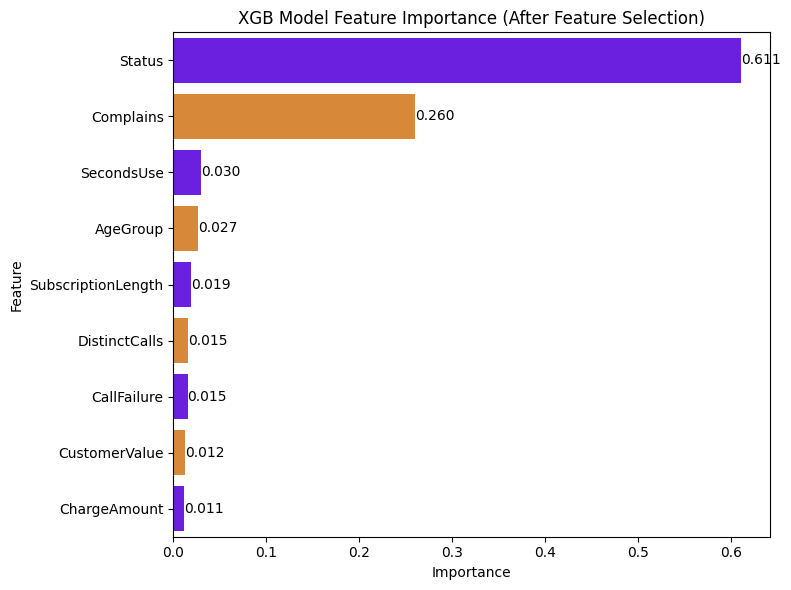

In [90]:
importancesfs = best_modelfs.feature_importances_
feature_namesfs = x_fs.columns
feature_importance_dfs = pd.DataFrame({'Feature': feature_namesfs, 'Importance': importancesfs}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
ax = sns.barplot(data = feature_importance_dfs, y="Feature", x="Importance", palette = palette)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%.3f', label_type = 'edge')  

plt.title('XGB Model Feature Importance (After Feature Selection)')
plt.tight_layout()
plt.show()

In [91]:
feature_importance_dfs

,Feature,Importance
7,Status,0.611028
1,Complains,0.259982
4,SecondsUse,0.029644
6,AgeGroup,0.026549
2,SubscriptionLength,0.018627
5,DistinctCalls,0.015441
0,CallFailure,0.015280
8,CustomerValue,0.012435
3,ChargeAmount,0.011014
